# Diseño de planta de adsorción de $Co^{2+}$ de soluciones acuosas
## Cálculos de las isotermas

In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#loading data
data = pd.read_excel('hoja_principal.xlsx', sheet_name='Isotermas', header=1)
df = data.drop(0, axis=0)

In [ ]:
df.head()

,Ensayo,Ce (ppm),qe (mg/g),ln Ce,ln q
1,2,22.42,77.6,3.109953,4.351567
2,3,46.89,103.2,3.847804,4.636669
3,4,78.47,123.5,4.362716,4.816241
4,5,112.11,137.9,4.719481,4.926529
5,6,148.62,153.5,5.001393,5.033701


## Isoterma de Langmuir

In [ ]:
#Calculating entry parameters
df['Ce/qe'] = df['Ce (ppm)'] / df['qe (mg/g)']


In [ ]:
#Making data fitting by linear method
a1 = np.polyfit(df['Ce (ppm)'], df['Ce/qe'],1)
p1 = np.poly1d(a1)
print(p1)

 
0.004071 x + 0.3081


In [ ]:
#insert regression data in data frame
df.insert(6,'Reg_langmuir',p1(df['Ce (ppm)']))

In [ ]:
# Show data
df

,Ensayo,Ce (ppm),qe (mg/g),ln Ce,ln q,Ce/qe,Reg_langmuir
1,2,22.42,77.6,3.109953,4.351567,0.288918,0.399411
2,3,46.89,103.2,3.847804,4.636669,0.454360,0.499036
3,4,78.47,123.5,4.362716,4.816241,0.635385,0.627609
4,5,112.11,137.9,4.719481,4.926529,0.812980,0.764569
5,6,148.62,153.5,5.001393,5.033701,0.968208,0.913213
6,7,224.50,173.6,5.413876,5.156754,1.293203,1.222147
7,8,397.06,204.6,5.984087,5.321057,1.940665,1.924696
8,9,582.81,218.0,6.367861,5.384495,2.673440,2.680947
9,10,775.57,226.1,6.653598,5.420977,3.430208,3.465738


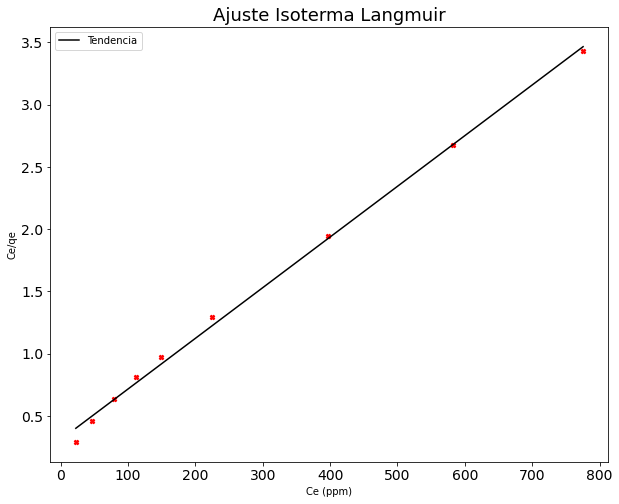

In [ ]:
# Plot of Langmuir Insotherm
ax = df.plot.scatter(x='Ce (ppm)', y='Ce/qe', figsize=(10,8), marker="X", color='r')
ax.grid(False)
ax.set_xlabel('Ce (ppm)')
ax.set_ylabel('Ce/qe')
ax.tick_params(labelsize = 14)
ax.set_title('Ajuste Isoterma Langmuir', fontdict={'fontsize': 18, 'fontweight': 'medium'})
ax.plot(df['Ce (ppm)'],df['Reg_langmuir'], color='k', label="Tendencia")
ax.legend()

In [ ]:
#R2 Calculation
pol = np.polyfit(df['Ce (ppm)'], df['Ce/qe'],1, full=True)
coeff = pol[0]
### Residual or Sum of Square Error (SSE)
SSE = pol[1][0]

### Determining the Sum of Square Total (SST)
## the squared differences between the observed dependent variable and its mean
diff = df['Ce/qe'] - df['Ce/qe'].mean()
square_diff = diff ** 2
SST = square_diff.sum()

###  Now getting the coefficient of determination (R2)
R2 = 1 - SSE/SST 
print(coeff,R2)

[0.00407134 0.30813142] 0.9971738447494785


Ecuación de la Recta Isoterma Langmuir

 $y = 0.00407134 {x} + 0.30813142$

 $R^{2} = 0.9971$

Parámetros de Langmuir

$B = \frac{1}{b*qmax}$

$m = \frac{1}{qmax}$

In [ ]:
#Calculate parameters b and qmax

qmax = 1 /coeff[0]
b = 1/coeff[1]*qmax 

print(qmax, b)

245.61956976027543 797.1260153421558



$qmax = 245,61 \frac{mg}{g}$

$b = 797,12 \frac{L}{mg}$

## Isoterma de Freundlich

In [ ]:
#Making data fitting by linear method
a2 = np.polyfit(df['ln Ce'], df['ln q'],1)
p2 = np.poly1d(a2)
print(p2)

 
0.3045 x + 3.467


In [ ]:
df.insert(7,'Reg_Freundlich',p2(df['Ce (ppm)']))

In [ ]:
df

,Ensayo,Ce (ppm),qe (mg/g),ln Ce,ln q,Ce/qe,Reg_langmuir,Reg_Freundlich
1,2,22.42,77.6,3.109953,4.351567,0.288918,0.399411,10.294990
2,3,46.89,103.2,3.847804,4.636669,0.454360,0.499036,17.747311
3,4,78.47,123.5,4.362716,4.816241,0.635385,0.627609,27.364979
4,5,112.11,137.9,4.719481,4.926529,0.812980,0.764569,37.610018
5,6,148.62,153.5,5.001393,5.033701,0.968208,0.913213,48.729114
6,7,224.50,173.6,5.413876,5.156754,1.293203,1.222147,71.838317
7,8,397.06,204.6,5.984087,5.321057,1.940665,1.924696,124.391348
8,9,582.81,218.0,6.367861,5.384495,2.673440,2.680947,180.961385
9,10,775.57,226.1,6.653598,5.420977,3.430208,3.465738,239.666313


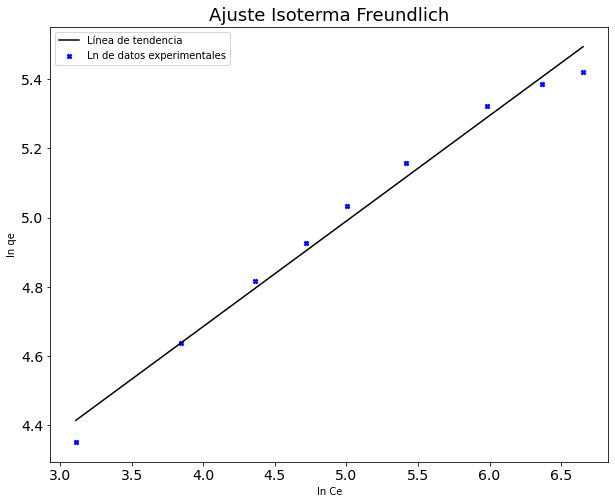

In [ ]:
#polynomial fit line as a 1st order
fit = np.polyfit(df['ln Ce'], df['ln q'], 1)
pf = np.poly1d(fit)

# making main graph
ax = df.plot.scatter(x='ln Ce', y='ln q', figsize=(10,8), marker="X", color='b',
                     label='Ln de datos experimentales')
ax.grid(False)
ax.set_xlabel('ln Ce')
ax.set_ylabel('ln qe')
ax.tick_params(labelsize = 14)
ax.set_title('Ajuste Isoterma Freundlich', fontdict={'fontsize': 18, 'fontweight': 'medium'})

#plot polynomial fit 
ax.plot(df['ln Ce'],pf(df['ln Ce']), color='k', label="Línea de tendencia")
ax.legend()

In [ ]:
#R2 Calculation
pol_fr = np.polyfit(df['ln Ce'], df['ln q'],1, full=True)
coeff = pol_fr[0]
### Residual or Sum of Square Error (SSE)
SSE = pol_fr[1][0]

### Determining the Sum of Square Total (SST)
## the squared differences between the observed dependent variable and its mean
diff = df['ln q'] - df['ln q'].mean()
square_diff = diff ** 2
SST = square_diff.sum()

###  Now getting the coefficient of determination (R2)
R2 = 1 - SSE/SST 
print(coeff,R2)

[0.30454932 3.46699368] 0.9855320396894929


Ecuación de la Recta Isoterma Freundlich

 $y = 0.30454932 {x} + 3.46699368$

 $R^{2} = 0.9855$

Parámetros de Freundlich

$B = Ln(K)$

$m = \frac{1}{n}$



In [ ]:
#Calculate parameters K and n

K = np.exp(coeff[1])
n = 1/coeff[0]

print(K, n)

32.04027407430119 3.283540368357265


$K = 32,04$

$n = 3,2835$

## Isoterma Temkin

In [ ]:
#Making data fitting by linear method
a3 = np.polyfit(df['ln Ce'],df['qe (mg/g)'],1)
p3 = np.poly1d(a3)
print(p3)

 
44.11 x - 65.26


In [ ]:
df.insert(8,'Reg_Temkin',p3(df['Ce (ppm)']))

In [ ]:
df

,Ensayo,Ce (ppm),qe (mg/g),ln Ce,ln q,Ce/qe,Reg_langmuir,Reg_Freundlich,Reg_Temkin
1,2,22.42,77.6,3.109953,4.351567,0.288918,0.399411,10.294990,923.732140
2,3,46.89,103.2,3.847804,4.636669,0.454360,0.499036,17.747311,2003.158319
3,4,78.47,123.5,4.362716,4.816241,0.635385,0.627609,27.364979,3396.222428
4,5,112.11,137.9,4.719481,4.926529,0.812980,0.764569,37.610018,4880.157723
5,6,148.62,153.5,5.001393,5.033701,0.968208,0.913213,48.729114,6490.695107
6,7,224.50,173.6,5.413876,5.156754,1.293203,1.222147,71.838317,9837.930844
7,8,397.06,204.6,5.984087,5.321057,1.940665,1.924696,124.391348,17449.936626
8,9,582.81,218.0,6.367861,5.384495,2.673440,2.680947,180.961385,25643.782674
9,10,775.57,226.1,6.653598,5.420977,3.430208,3.465738,239.666313,34146.855429


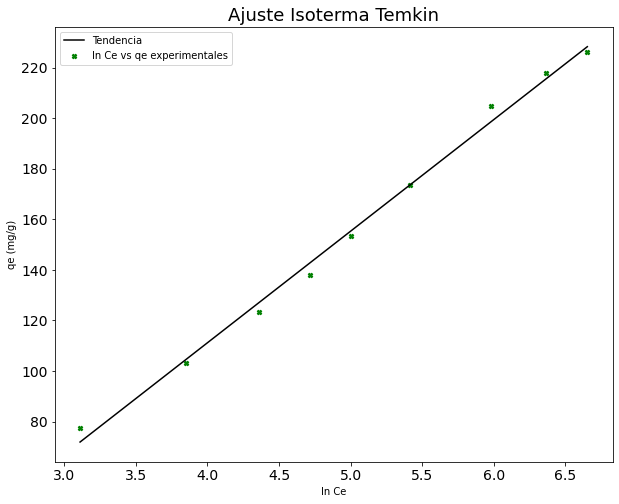

In [ ]:
#polynomial fit line as a 1st order
fit = np.polyfit(df['ln Ce'], df['qe (mg/g)'], 1)
pf = np.poly1d(fit)

ax = df.plot.scatter(x='ln Ce', y='qe (mg/g)', figsize=(10,8), marker="X", color='g',
                     label='ln Ce vs qe experimentales')
ax.grid(False)
ax.set_xlabel('ln Ce')
ax.set_ylabel('qe (mg/g)')
ax.tick_params(labelsize = 14)
ax.set_title('Ajuste Isoterma Temkin', fontdict={'fontsize': 18, 'fontweight': 'medium'})
ax.plot(df['ln Ce'],pf(df['ln Ce']), color='k', label='Tendencia')
ax.legend()

In [ ]:
#R2 Calculation
pol_tk = np.polyfit(df['ln Ce'], df['qe (mg/g)'],1, full=True)
coeff = pol_tk[0]
### Residual or Sum of Square Error (SSE)
SSE = pol_tk[1][0]

### Determining the Sum of Square Total (SST)
## the squared differences between the observed dependent variable and its mean
diff = df['qe (mg/g)'] - df['qe (mg/g)'].mean()
square_diff = diff ** 2
SST = square_diff.sum()

###  Now getting the coefficient of determination (R2)
R2 = 1 - SSE/SST 
print(coeff,R2)

[ 44.11222637 -65.26397557] 0.9944321901192923


Ecuación de la Recta Isoterma Freundlich

 $y = 44.11222637 {x} - 65.26397557$

 $R^{2} = 0.9944$

Parámetros de Temkin

$B = \frac{RT}{b}Ln(A)$

$m = \frac{RT}{b}$



In [ ]:
#Calculate parameters A and b
R = 0.008314  
T = 298.15
A = np.exp(coeff[1]/coeff[0])
b = (R*T / coeff[0])

print(A, b)


0.2277518627420418 0.05619347070108778


$A = 0,2277 \frac{l}{g}$

$b = 0,0561 \frac{kJ}{mol}$

$b \leq 40 \frac{kJ}{mol} \Rightarrow Fisisorción$

In [ ]:
df.to_excel('Isotermas_data.xlsx', sheet_name='Python')

# Determinación de la cinética de adsorción

## Datos experimentales

Obtenidos del estudio de Bernabé I, et al. (2019)
Disponible en: https://www.hindawi.com/journals/amse/2019/3430176/

In [ ]:
data_cinetica = pd.read_excel('hoja_principal.xlsx', sheet_name='Cinética', header=1)
#df = data_cinetica.drop(0, axis=0)
data_cinetica

,t (min),q(mg/g),ln(q),t/q,1er Orden,2ndo Orden
0,1.0,1.350,0.300105,0.740741,0.355403,0.727780
1,2.5,1.400,0.336472,1.785714,0.359126,1.722759
2,4.0,1.480,0.392042,2.702703,0.362850,2.717739
3,7.5,1.500,0.405465,5.000000,0.371538,5.039358
4,12.5,1.500,0.405465,8.333333,0.383950,8.355957
5,15.0,1.501,0.406132,9.993338,0.390155,10.014257
6,20.0,1.501,0.406132,13.324450,0.402567,13.330856
7,32.0,1.501,0.406132,21.319121,0.432355,21.290693


Text(0.5, 1.0, 'Curva de Cinética de Adsorción')

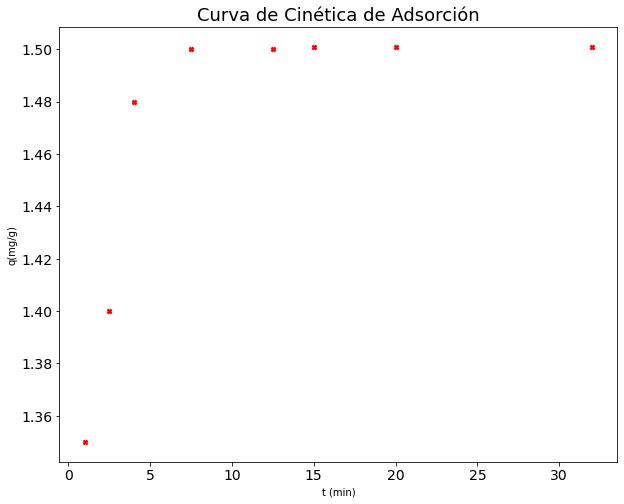

In [ ]:
df_data_cinetica = pd.DataFrame(data_cinetica)
ax_1 = df_data_cinetica.plot.scatter(x='t (min)', y='q(mg/g)', figsize=(10,8),
                          marker='X', color='r')
ax_1.set_xlabel('t (min)')
ax_1.set_ylabel('q(mg/g)')
ax_1.tick_params(labelsize = 14)
ax_1.set_title('Curva de Cinética de Adsorción', fontdict={'fontsize': 18, 'fontweight': 'medium'})


## Ecuación de Pseudo primer Orden

$q_t = q_e(1-{e}^{kt})$

Linealizando la ecuación queda:

$\ln({q_t}) = \ln({q_e}) + kt$

Por tanto,

$m = k$

$b = \ln{q_e}$

In [ ]:
#Making data fitting by linear method
c1 = np.polyfit(data_cinetica['t (min)'], data_cinetica['ln(q)'],1)
e1 = np.poly1d(c1)
print(e1)

 
0.002482 x + 0.3529


In [ ]:
# data_cinetica.insert(4,'1er Orden',e1(df_data_cinetica['t (min)']))
# data_cinetica

Text(0.5, 1.0, 'Curva de Cinética de Adsorción Optimizada')

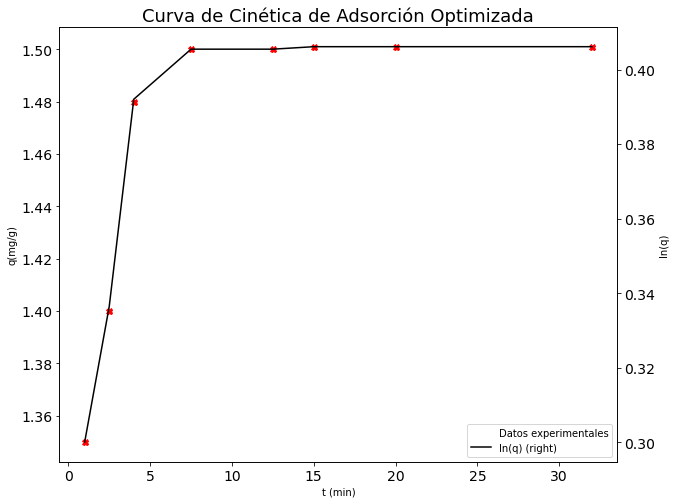

In [ ]:
ax_1 = df_data_cinetica.plot(x='t (min)', y='q(mg/g)', figsize=(10,8),
                          marker='X', color='red', label='Datos experimentales',
                          linestyle='none')
ax_2 = df_data_cinetica.plot.line(x='t (min)', y='ln(q)', secondary_y=True, 
                                  ax=ax_1, color='k')
ax_1.grid(False)
ax_1.set_xlabel('t (min)')
ax_1.set_ylabel('q(mg/g)')
ax_2.set_ylabel('ln(q)')
ax_1.tick_params(labelsize = 14)
ax_2.tick_params(labelsize=14)
ax_1.set_title('Curva de Cinética de Adsorción Optimizada', 
               fontdict={'fontsize': 18, 'fontweight': 'medium'})
# ax_1.legend()
# ax_2.legend()


In [ ]:
#R2 Calculation
pol_1 = np.polyfit(df_data_cinetica['t (min)'], df_data_cinetica['ln(q)'],1, full=True)
coeff = pol_1[0]
### Residual or Sum of Square Error (SSE)
SSE = pol_1[1][0]

### Determining the Sum of Square Total (SST)
## the squared differences between the observed dependent variable and its mean
diff = df_data_cinetica['1er Orden'] - df_data_cinetica['1er Orden'].mean()
square_diff = diff ** 2
SST = square_diff.sum()

###  Now getting the coefficient of determination (R2)
R2 = 1 - SSE/SST 
print(coeff,R2)

[0.00248235 0.35292021] -0.4767369910566026


In [ ]:
k = coeff[0]
q_eq = np.exp(coeff[1])

print(k, q_eq)

0.002482350379909182 1.4232175803930447


Ecuación de la recta modelo pseudo-primer orden:

$\ln{q_t} = \ln{q_e} + kt$

$\ln{q_t} = 0.002482*{t} + 0.352920$

Parámetros pseudo primer orden:

$k = 0.002482 min^{-1}$

$q_e = 1.42321 \frac{mg}{g}$

$R^2 = - 0.4037$

## Evaluación Modelo cinético Pseudo segundo orden

$\frac{dq}{dt} = k_2*({q_e}-{q})^{2}$

Linealizando la ecuación nos queda:

$\frac{t}{q} = \frac{1}{{k_2}*{q_e}^{2}} + \frac{1}{q_e}*t$

por tanto:

$m = \frac{1}{q_e}$

$b = \frac{1}{{k_2}*{q_e}^{2}}$

In [ ]:
#Making data fitting by linear method
c2 = np.polyfit(df_data_cinetica['t (min)'], df_data_cinetica['t/q'],1)
e2 = np.poly1d(c2)
print(e2)

 
0.6633 x + 0.06446


In [ ]:
# data_cinetica.insert(5,'2ndo Orden',e2(data_cinetica['t (min)']))
# data_cinetica

Text(0.5, 1.0, 'Curva de Cinética de Adsorción Optimizada')

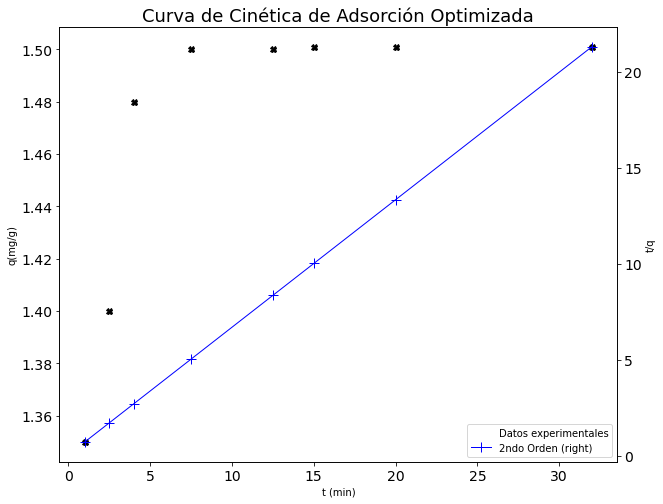

In [ ]:
ax_1 = df_data_cinetica.plot(x='t (min)', y='q(mg/g)', figsize=(10,8),
                          marker='X', color='k',label='Datos experimentales',
                          linestyle='none')
ax_2 = df_data_cinetica.plot.line(x='t (min)', y='2ndo Orden', secondary_y=True, 
                          ax=ax_1, color='b', marker='+', ms=10, lw=1)
ax_1.grid(False)
ax_1.set_xlabel('t (min)')
ax_1.set_ylabel('q(mg/g)')
ax_2.set_ylabel('t/q')
ax_1.tick_params(labelsize = 14)
ax_2.tick_params(labelsize=14)
ax_1.set_title('Curva de Cinética de Adsorción Optimizada', 
               fontdict={'fontsize': 18, 'fontweight': 'medium'})

In [ ]:
#R2 Calculation
pol_2 = np.polyfit(df_data_cinetica['t (min)'], df_data_cinetica['t/q'],1, full=True)
coeff = pol_2[0]
### Residual or Sum of Square Error (SSE)
SSE = pol_2[1][0]

### Determining the Sum of Square Total (SST)
## the squared differences between the observed dependent variable and its mean
diff = df_data_cinetica['2ndo Orden'] - df_data_cinetica['2ndo Orden'].mean()
square_diff = diff ** 2
SST = square_diff.sum()

###  Now getting the coefficient of determination (R2)
R2 = 1 - SSE/SST 
print(coeff,R2)

[0.66331979 0.06446   ] 0.9999772120870403


In [ ]:
#Parameters calculation
q_e = 1/coeff[0]
k_2 = 1/(coeff[1]*(q_e**2))

print(q_e, k_2)

1.5075684781994318 6.82583166212299


Ecuación de la recta:

$\frac{t}{q} = 0.66331*{t} + 0.0644$

$R^2 = 0.99997$

Parámetros de segundo Orden

$q_e = 1.50075 \frac{mg}{g}$

$k_2 = 6.825 \frac{g}{{mg * min}}$

In [ ]:
data_cinetica.to_excel('cinética_data.xlsx', sheet_name='Python')

# Modelado de la Columna
## Relación Carbón Activo - Caudal

$\frac{mc}{Q}$ = $\frac{C_o-C_f}{q_e}$

partiendo de $Q = 1,000 \frac{L}{h}$

Con esta relación se espera encontrar ▶

Volumen de lecho ${V_c}$, Area transversal lecho ${S_c}$, altura lecho ${L_c}$ y altura columna ${L_T}$

In [ ]:
rho_carbon = 640 or None # densidad de carbón activo g/L
Co = 20 #mg/L
Cf = 2 #mg/L
qe = 1.500 #mg Cobalto/g carbón activo
Q = 100 # L/h

# asumiendo 1 hora de proceso

mc = ((Co - Cf) / qe) * Q
print(f'La masa de carbón activo necesario es:', round(mc,2), 'g')

Vc = mc / rho_carbon
print(f'El volumen de carbón activo necesario es:', round(Vc,4), 'L')

La masa de carbón activo necesario es: 1200.0 g
El volumen de carbón activo necesario es: 1.875 L


## Cálculo del area (Sc) y altura (Lc)

In [ ]:
V_meso_gramo = 1.05 #cm3/ g
V_meso = (V_meso_gramo/1000)*mc #V_meso en L
Eb = V_meso / Vc

print(f'La porosidad es:', round(Eb,4))

# Asumiendo diámetro de 100 mm de lecho
Dc = 0.088 #m
Sc = (np.pi*(Dc)**2) / 4

print(f'El área de sección transversal es:', round(Sc,4), 'm^2')


La porosidad es: 0.672
El área de sección transversal es: 0.0061 m^2


In [ ]:
Lc = Vc/(Sc*1000)
print(f'La longitud del lecho es:', round(Lc,4), 'm')

# añadiendo 20% de compensación
Lt = 1.20*Lc
print(f'longitud total de la columna:', round(Lt,4), 'm')

La longitud del lecho es: 0.3083 m
longitud total de la columna: 0.3699 m


In [ ]:
Qs_array = np.linspace(20, 500, 20)
def column_dinamica(C1, C2, q, Q_s, rho):
  Sc = (np.pi*(Dc)**2) / 4
  mc = []
  # se va a calcular mása de adsorbente, Volumne, area transversal, Longitudes
  # para varios caudales
  for Q in Q_s:
    mc.append(((C1-C2)*Q)/q)
    Vc = np.array(mc)/rho
    Lc = np.array(Vc/(Sc*1000))
    Lt = np.array(1.20*Lc)
  df = pd.DataFrame({'Caudal (L/h)': Q_s,'Masa carbón (g)': np.array(mc), 'Volumen de carbón m3': Vc, 
                     'Altura del lecho, m':Lc, 'Altura total (m)':Lt})
  
  return df




In [ ]:
data = column_dinamica(20,2, 1.500, Qs_array, rho_carbon)
data

,Caudal (L/h),Masa carbón (g),Volumen de carbón m3,"Altura del lecho, m",Altura total (m)
0,20.000000,240.000000,0.375000,0.061656,0.073987
1,45.263158,543.157895,0.848684,0.139537,0.167445
2,70.526316,846.315789,1.322368,0.217419,0.260903
3,95.789474,1149.473684,1.796053,0.295300,0.354360
4,121.052632,1452.631579,2.269737,0.373182,0.447818
5,146.315789,1755.789474,2.743421,0.451063,0.541276
6,171.578947,2058.947368,3.217105,0.528944,0.634733
7,196.842105,2362.105263,3.690789,0.606826,0.728191
8,222.105263,2665.263158,4.164474,0.684707,0.821649
9,247.368421,2968.421053,4.638158,0.762589,0.915106


# Scaling-Up del proceso
## Datos de entrada del proceso

Partiremos de las condiciones de entrada reales de las aguas de la Rep. Dem. del
Congo. Seguidamente, dimensionaremos las columnas de adsorción.

## CAlCULOS HECHOS EN EXCEL

# Simulación de la Columna Empacada

Aplicaremos el modelo de adsorción pseudo segundo orden:

$\frac{dq}{dt} = k_2*({q_e}-{q})^{2}$

In [ ]:
Cs = np.linspace(5,100, num=8) # mg/L
Vt = 225000 #L escala industrial
mt = 22476000 #g masa industrial
Ci = 150 #mg/L
qf = []
for C in Cs:
  qf.append(((Ci - C)*Vt)/mt)
qf

[1.4515483182060864,
 1.315689116009458,
 1.179829913812829,
 1.0439707116162,
 0.9081115094195714,
 0.7722523072229425,
 0.6363931050263137,
 0.500533902829685]

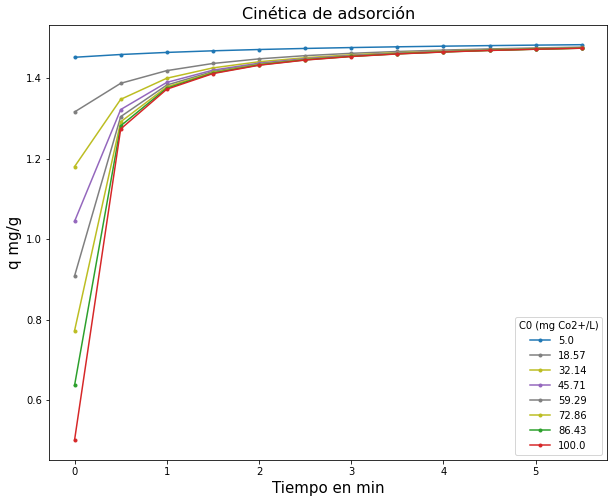

In [ ]:
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.colors as mcolors
%matplotlib inline

# Model 
def F(q,t):
  qe = 1.5
  k_2 = 6.82583
  dqdt = k_2*((qe - q)**2)
  return dqdt


# Plot ODE

xt = {}
ys = {}
sol= {}
plt.figure(figsize=(10,8),)
colors = list(mcolors.TABLEAU_COLORS)
for i in range(len(qf)):
  j = np.random.randint(0, 9)
  xt[i] = np.arange(0,6, 0.5)
  sol[i] = odeint(F, qf[i], xt[i])
  ys[i] = np.array(sol[i]).flatten()
  plt.plot(xt[i], ys[i], marker =".", color=colors[j], label= round(Cs[i], 2))
  plt.title('Cinética de adsorción', fontsize=16)
  plt.ylabel('q mg/g', fontsize=15)
  plt.xlabel('Tiempo en min', fontsize=15)
plt.legend(title="C0 (mg Co2+/L)", loc="best")
plt.show()



In [ ]:
Vol = 35118.75 # L
def ThomasModel(t):
  Y = 1 / (1 + np.exp((k_2*qe*mt) / Vt - k_2*Ci*Vol))
  return Y

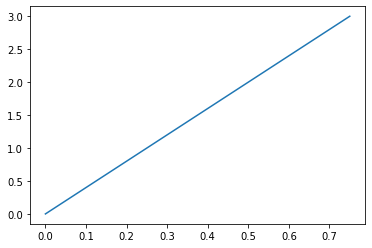

In [ ]:
xtt = np.arange(0,1,0.25, dtype=np.float64)
Y_C = {}
for i in range(len(xtt)):
  Y_C[i] = ThomasModel(xtt[i])

plt.plot(xtt, list(Y_C))


In [ ]:
list(Y_C)

[0, 1, 2, 3, 4]

In [ ]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
!jupyter nbconvert --to html /content/Script_Walopez.ipynb

[NbConvertApp] Converting notebook /content/Script_Walopez.ipynb to html
[NbConvertApp] Writing 651158 bytes to /content/Script_Walopez.html


In [ ]:
!jupyter nbconvert --to pdf /content/Script_Walopez.ipynb

[NbConvertApp] Converting notebook /content/Script_Walopez.ipynb to pdf
[NbConvertApp] Support files will be in Script_Walopez_files/
[NbConvertApp] Making directory ./Script_Walopez_files
[NbConvertApp] Making directory ./Script_Walopez_files
[NbConvertApp] Making directory ./Script_Walopez_files
[NbConvertApp] Making directory ./Script_Walopez_files
[NbConvertApp] Making directory ./Script_Walopez_files
[NbConvertApp] Making directory ./Script_Walopez_files
[NbConvertApp] Making directory ./Script_Walopez_files
[NbConvertApp] Making directory ./Script_Walopez_files
[NbConvertApp] Writing 88060 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 248960 bytes to /content/Script_Walopez.pdf
